# Preprocesamiento 

Este DataFrame encontramos un conjunto de datos de retroalimentación o encuestas relacionadas con la experiencia de los pasajeros en vuelos, nuestro objetivo predecir o **analizar la satisfacción del cliente**. Las columnas son:


1. **satisfaction:** Indica la satisfacción del cliente, probablemente como una etiqueta de clase (por ejemplo, "satisfied" o "unsatisfied").
2. **Gender:** El género del pasajero (por ejemplo, "Female" o "Male").
3. **Customer Type:** El tipo de cliente, posiblemente indicando si el cliente es un "Loyal Customer" (cliente leal) u otro tipo.
4. **Age:** La edad del pasajero.
5. **Type of Travel:** El propósito del viaje, como "Personal Travel" (viaje personal).
6. **Class:** La clase del vuelo, como "Eco" (económica) o "Business" (negocios).
7. **Flight Distance:** La distancia del vuelo en kilómetros.
8. **Seat comfort:** Evaluación de la comodidad del asiento (posiblemente en una escala).
9. **Departure/Arrival time convenient:** Evaluación de la conveniencia de los horarios de salida/llegada.
10. **Food and drink:** Evaluación de la comida y bebida a bordo.
11. **Gate location:** Evaluación de la ubicación de la puerta de embarque.
12. **Inflight wifi service:** Evaluación del servicio de wifi a bordo.
13. **Inflight entertainment:** Evaluación del entretenimiento a bordo.
14. **Online support:** Evaluación del soporte en línea.
15. **Ease of Online booking:** Evaluación de la facilidad de reserva en línea.
16. **On-board service:** Evaluación del servicio a bordo.
17. **Leg room service:** Evaluación del espacio para las piernas.
18. **Baggage handling:** Evaluación del manejo del equipaje.
19. **Checkin service:** Evaluación del servicio de check-in.
20. **Cleanliness:** Evaluación de la limpieza en el avión.
21. **Online boarding:** Evaluación del proceso de embarque en línea.
22. **Departure Delay in Minutes:** La demora en minutos en la salida del vuelo.
23. **Arrival Delay in Minutes:** La demora en minutos en la llegada del vuelo.









## 1. Librerias 

In [1]:

# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd


# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.ticker as ticker
import seaborn as sns



# Preprocesamiento
# ==============================================================================
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OneHotEncoder  
from sklearn.preprocessing import OrdinalEncoder
import math
from sklearn.preprocessing import MinMaxScaler
from scipy import stats


# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer


#Linear Regresion con Sklearn
# ==============================================================================
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics




# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')


# Tamaño gráficas
# ==============================================================================
plt.rcParams["figure.figsize"] = (10,8)

In [2]:
df = pd.read_csv('satisfaccion_aerolineas.csv', index_col=0)
df.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,NaN,Personal Travel,Eco,NaN,0,0.0,0.0,...,2,NaN,3.0,0.0,3.0,5.0,3.0,2.0,0.0,0.0
1,satisfied,Male,Loyal Customer,47.0,Personal Travel,NaN,2464.0,0,0.0,0.0,...,2,3.0,4.0,4.0,4.0,2.0,3.0,2.0,310.0,305.0
2,satisfied,Female,Loyal Customer,NaN,Personal Travel,Eco,NaN,0,0.0,0.0,...,2,2.0,NaN,3.0,4.0,4.0,4.0,2.0,0.0,0.0
3,satisfied,Female,Loyal Customer,NaN,Personal Travel,Eco,623.0,0,0.0,0.0,...,3,1.0,1.0,NaN,NaN,NaN,1.0,3.0,0.0,0.0
4,satisfied,Female,Loyal Customer,NaN,Personal Travel,NaN,354.0,0,0.0,0.0,...,4,2.0,2.0,0.0,2.0,4.0,NaN,5.0,0.0,0.0


## 2.EDA

In [3]:
# Cuantas filas y columnas tenemos

df.shape

(129880, 23)

In [4]:
# numero de valores nulos
df.isnull().sum()   

satisfaction                             0
Gender                               42471
Customer Type                        37182
Age                                  42471
Type of Travel                       10390
Class                                42471
Flight Distance                      42471
Seat comfort                             0
Departure/Arrival time convenient    11689
Food and drink                       11689
Gate location                        42471
Inflight wifi service                25716
Inflight entertainment                   0
Online support                           0
Ease of Online booking               30392
On-board service                     30392
Leg room service                     30392
Baggage handling                     14287
Checkin service                      14287
Cleanliness                          25716
Online boarding                      25716
Departure Delay in Minutes           10390
Arrival Delay in Minutes               393
dtype: int6

In [5]:
# numero de duplicados 
df.duplicated().sum()

1

In [8]:
# eliminamos los duplicados 
df.drop_duplicates(inplace=True)

In [9]:
# comprobamos de duplicados 
df.duplicated().sum()

0

In [10]:
# exploramos los tipos de datos
df.dtypes

satisfaction                          object
Gender                                object
Customer Type                         object
Age                                  float64
Type of Travel                        object
Class                                 object
Flight Distance                      float64
Seat comfort                           int64
Departure/Arrival time convenient    float64
Food and drink                       float64
Gate location                        float64
Inflight wifi service                float64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking               float64
On-board service                     float64
Leg room service                     float64
Baggage handling                     float64
Checkin service                      float64
Cleanliness                          float64
Online boarding                      float64
Departure Delay in Minutes           float64
Arrival De

## Tipos de variables 

In [33]:
df[["Seat comfort",'Departure/Arrival time convenient','Food and drink','Gate location','Inflight wifi service', 'Inflight entertainment', 'Online support','Ease of Online booking', 'On-board service', 'Leg room service','Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding']] = df[["Seat comfort",'Departure/Arrival time convenient','Food and drink','Gate location','Inflight wifi service', 'Inflight entertainment', 'Online support','Ease of Online booking', 'On-board service', 'Leg room service','Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding']].astype("category")



In [39]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,87408.0,39.402560,15.136135,7.0,27.0,40.0,51.0,85.0
Flight Distance,87409.0,1977.685776,1026.035379,50.0,1357.0,1919.0,2539.0,6951.0
Departure Delay in Minutes,119489.0,14.680322,37.942931,0.0,0.0,0.0,12.0,1592.0
Arrival Delay in Minutes,129486.0,15.091245,38.465776,0.0,0.0,0.0,13.0,1584.0


In [40]:
# exploramos variables categóricas

df.describe(include  = ["object","category"]).T

,count,unique,top,freq
satisfaction,129879,2,satisfied,71086
Gender,87408,2,Female,44344
Customer Type,92697,2,Loyal Customer,75708
Type of Travel,119489,2,Business travel,82471
Class,87409,3,Business,41805
Seat comfort,129879,6,3,29183
Departure/Arrival time convenient,118190.0,6.0,4.0,26938.0
Food and drink,118190.0,6.0,3.0,25659.0
Gate location,87409.0,6.0,3.0,22610.0
Inflight wifi service,104163.0,6.0,4.0,25382.0


## 3. Analisis visual 

### Variable respuesta 

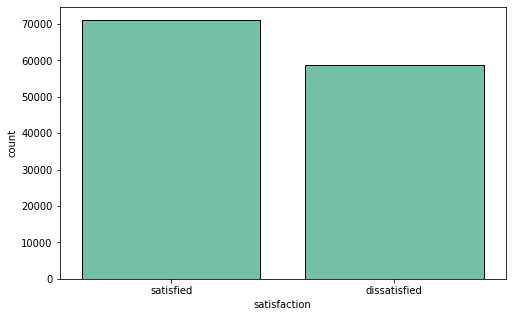

In [41]:
plt.figure(figsize=(8,5)) # para cambiar el tamaño de la figura

fig1 = sns.countplot(data = df, x = "satisfaction",  color = "mediumaquamarine",  edgecolor='black'); 

plt.show();

In [18]:
df["satisfaction"].value_counts()/ df.shape[0] * 100

satisfaction
satisfied       54.732482
dissatisfied    45.267518
Name: count, dtype: float64

In [21]:
df["satisfaction"].value_counts()

satisfaction
satisfied       71086
dissatisfied    58793
Name: count, dtype: int64

⚠️Parece que tenemos una predominancia de personas satisfechas aunque sean ligeramente superior 

## Variables categoricas

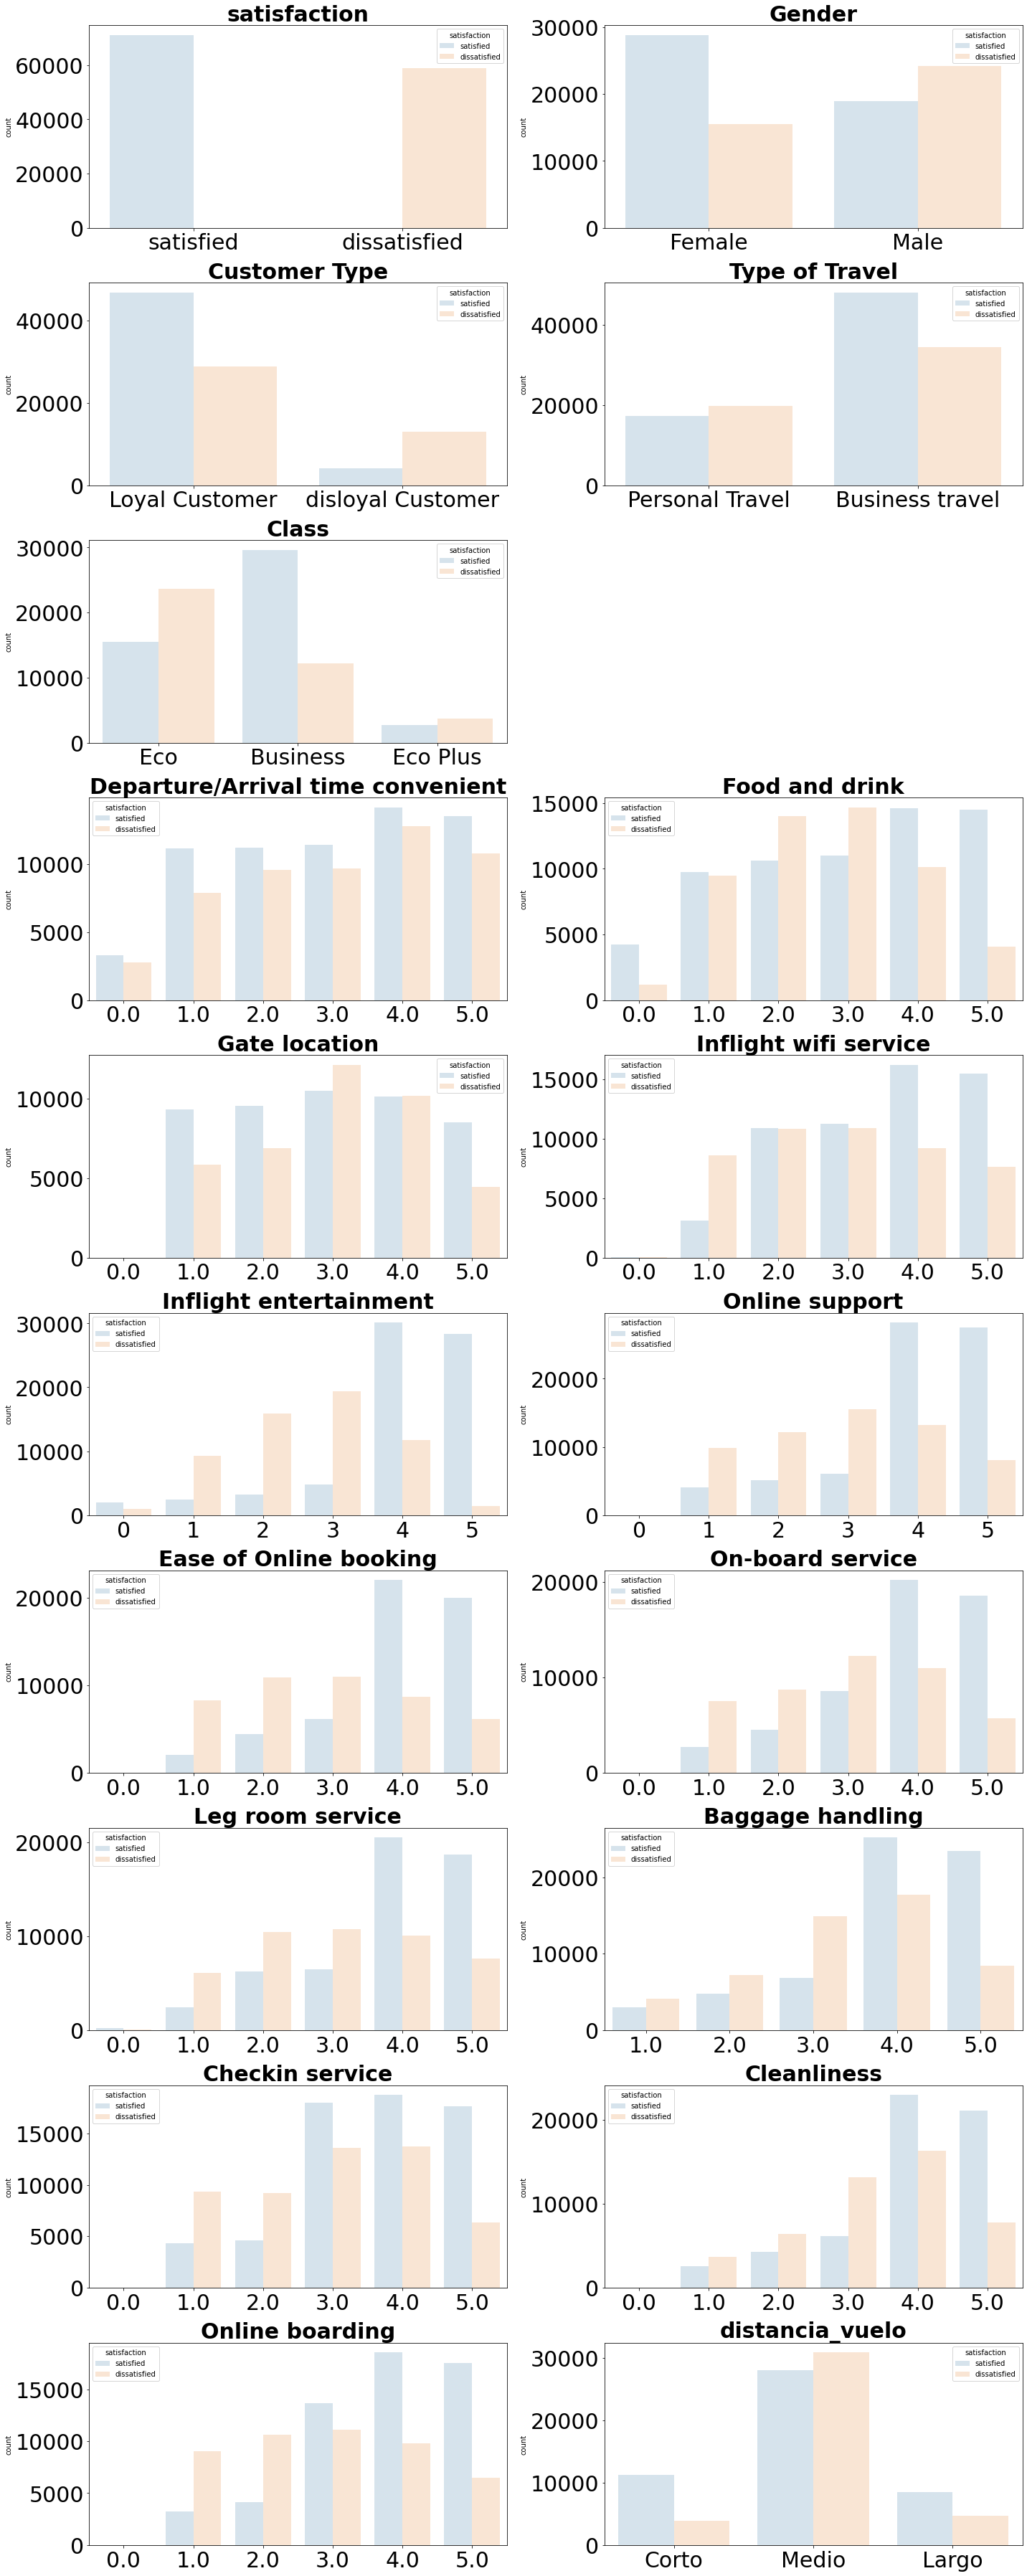

In [81]:
# Gráfico de distribución para cada variable categórica
# ==============================================================================

fig, axes = plt.subplots(nrows = 10, ncols = 2 , figsize = (20, 50))


axes = axes.flat

columnas_cat = df.select_dtypes(include = ["object","category"]).columns

for i, colum in enumerate(columnas_cat): 
    sns.countplot(
        data = df,
        x = colum,
        hue = "satisfaction",
        alpha = 0.2, 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 30, fontweight = "bold")
    axes[i].tick_params(labelsize = 30)
    axes[i].set_xlabel("")

fig.delaxes(axes[5])
fig.tight_layout();

#### Gender

In [29]:
df[df["Gender"] == "Female"]["satisfaction"].value_counts()/df.shape[0] * 100  

satisfaction
satisfied       22.182185
dissatisfied    11.960363
Name: count, dtype: float64

In [30]:
df[df["Gender"] == "Male"]["satisfaction"].value_counts()/df.shape[0] * 100  

satisfaction
dissatisfied    18.590380
satisfied       14.566635
Name: count, dtype: float64

- En terminos generales las mujeres estan mas satisfechas que los hombres. Por otro lado, dentro de ellas el 33% no esta satisfechas. 




### varaibles numericas 

In [73]:
df.columns

Index(['satisfaction', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
      dtype='object')

In [74]:
df['Flight Distance']

count    87409.000000
mean      1977.685776
std       1026.035379
min         50.000000
25%       1357.000000
50%       1919.000000
75%       2539.000000
max       6951.000000
Name: Flight Distance, dtype: float64

In [79]:

#diccionario = {"corto": 1500, "medio": 5500, "largo": 10000}

# Creamos una nueva columna con la distancia del vuelo
df['distancia_vuelo'] = pd.cut(df['Flight Distance'], bins=[0, 1000, 3000, float('inf')], labels=['Corto', 'Medio', 'Largo'])


In [80]:
df

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,distancia_vuelo
0,satisfied,Female,Loyal Customer,NaN,Personal Travel,Eco,NaN,0,0.0,0.0,...,NaN,3.0,0.0,3.0,5.0,3.0,2.0,0.0,0.0,NaN
1,satisfied,Male,Loyal Customer,47.0,Personal Travel,NaN,2464.0,0,0.0,0.0,...,3.0,4.0,4.0,4.0,2.0,3.0,2.0,310.0,305.0,Medio
2,satisfied,Female,Loyal Customer,NaN,Personal Travel,Eco,NaN,0,0.0,0.0,...,2.0,NaN,3.0,4.0,4.0,4.0,2.0,0.0,0.0,NaN
3,satisfied,Female,Loyal Customer,NaN,Personal Travel,Eco,623.0,0,0.0,0.0,...,1.0,1.0,NaN,NaN,NaN,1.0,3.0,0.0,0.0,Corto
4,satisfied,Female,Loyal Customer,NaN,Personal Travel,NaN,354.0,0,0.0,0.0,...,2.0,2.0,0.0,2.0,4.0,NaN,5.0,0.0,0.0,Corto
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,satisfied,Female,NaN,29.0,Personal Travel,Eco,NaN,5,5.0,5.0,...,2.0,3.0,3.0,4.0,NaN,4.0,NaN,0.0,0.0,NaN
129876,dissatisfied,NaN,disloyal Customer,63.0,Personal Travel,NaN,2087.0,2,3.0,2.0,...,NaN,2.0,3.0,3.0,1.0,2.0,NaN,174.0,172.0,Medio
129877,dissatisfied,Male,disloyal Customer,69.0,Personal Travel,Eco,2320.0,3,0.0,3.0,...,NaN,4.0,3.0,NaN,2.0,3.0,2.0,155.0,163.0,Medio
129878,dissatisfied,NaN,disloyal Customer,66.0,Personal Travel,Eco,2450.0,3,2.0,NaN,...,NaN,3.0,2.0,3.0,2.0,1.0,2.0,193.0,205.0,Medio
